In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Working with 10 images.
Image examples: 
1   :   11677780404_d086fda23e_o.jpg
2   :   morning_shine-wide.jpg
3   :   light_source-wide.jpg
4   :   desktop-mobile-ultra-fine-hd-quality-sunrise-wallpaper.jpg
5   :   cobblestone-hd.jpg
6   :   cloud-horizon-landscape-nature-road-a4.jpg
7   :   Hipster-Desktop-Wallpapers-HD-Free.jpg
8   :   autumn_forest_5k_5.jpg
9   :   hot_air_balloon_above_clouds_5k.jpg
10   :   shootingstar.jpg
-----------------------------------------------------

Enter any number to access the image : 8


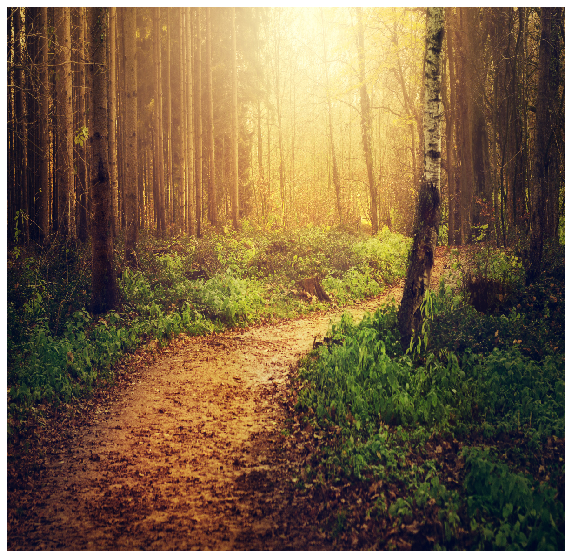

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import os

folder = r'/content/drive/MyDrive/images'

#simple image scaling to (nR x nC) size
def scale(im, nR, nC):
    nR0 = len(im)     # source number of rows 
    nC0 = len(im[0])  # source number of columns 
    return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  
             for c in range(nC)] for r in range(nR)]


onlyfiles = [f for f in os.listdir(folder)
             if os.path.isfile(os.path.join(folder, f))]

print("Working with 10 images.")
print("Image examples: ")
stack=[]

for i in range(0, 10):
    print(i+1,"  :  ",onlyfiles[i])
    c=image.imread(folder + "/" + onlyfiles[i])
    
    c = scale(c,1200,1200)        #resizing the images
    
    c=np.array(c)
    stack.append(c)
    
print("-----------------------------------------------------")    

index=int(input("\nEnter any number to access the image : "))   

if index>0 and index<=10 :
       plt.figure(figsize = (10,10))
       a=plt.imshow(stack[index-1],interpolation='nearest',aspect="auto")
       plt.axis('off')

else :
    print("Invalid choice")
 

-----------------------------------------------------
ALBUM OF ABSTRACT ART...
The number of images :  10


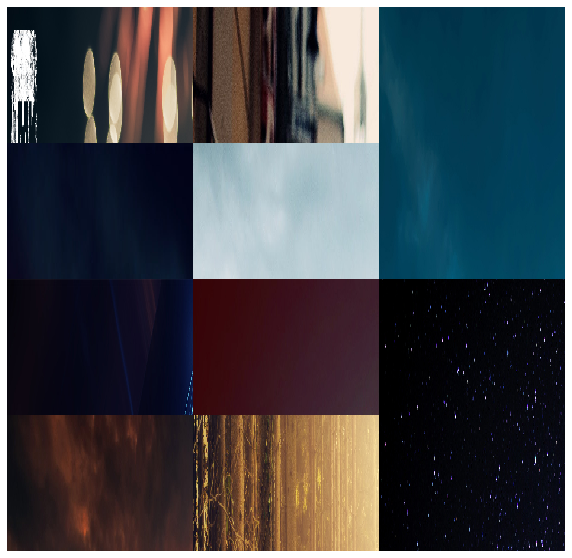

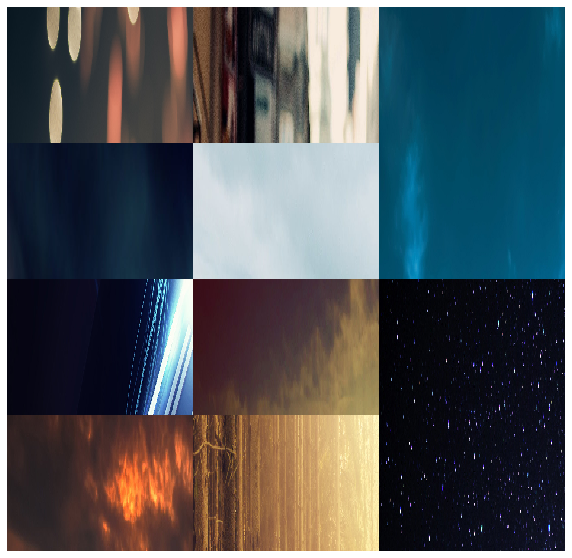

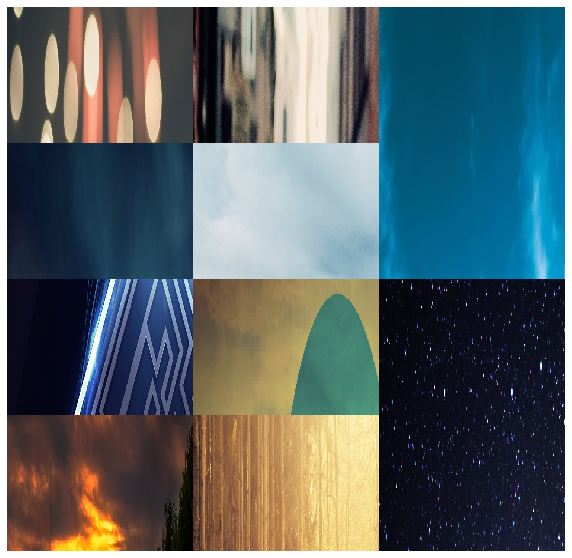

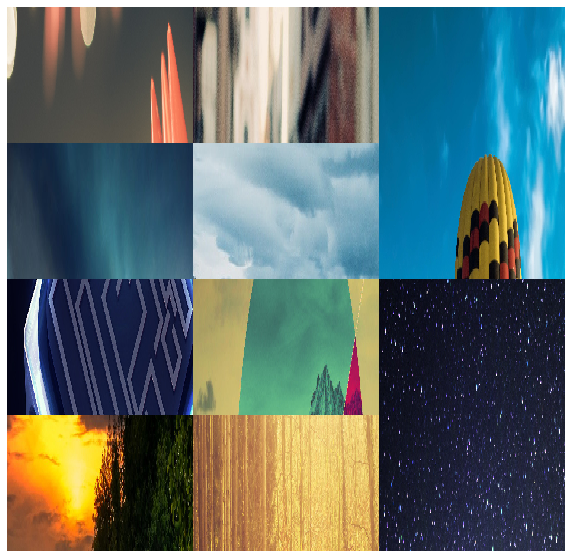

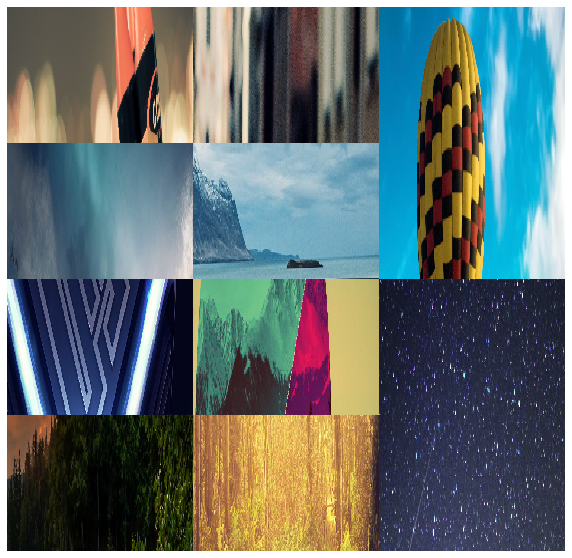

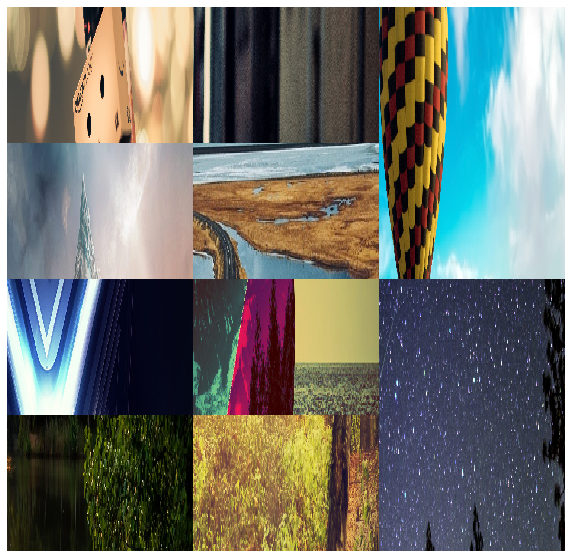

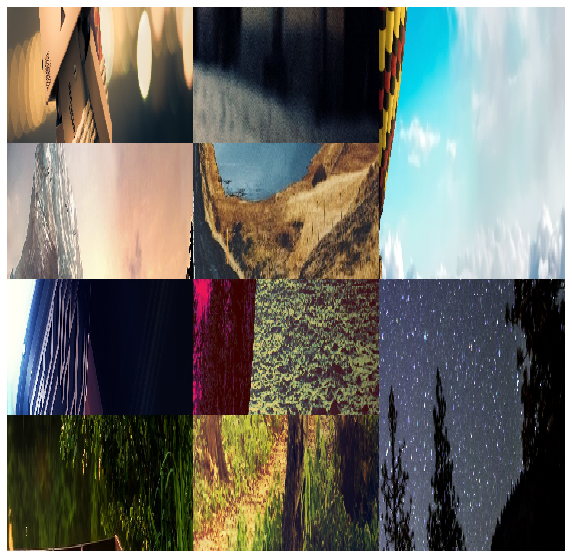

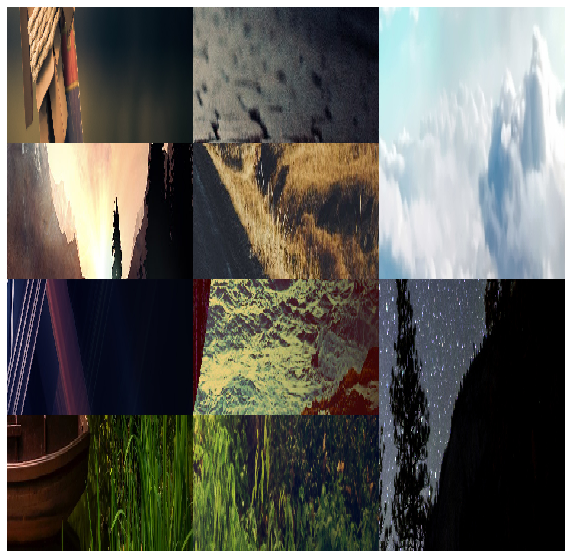

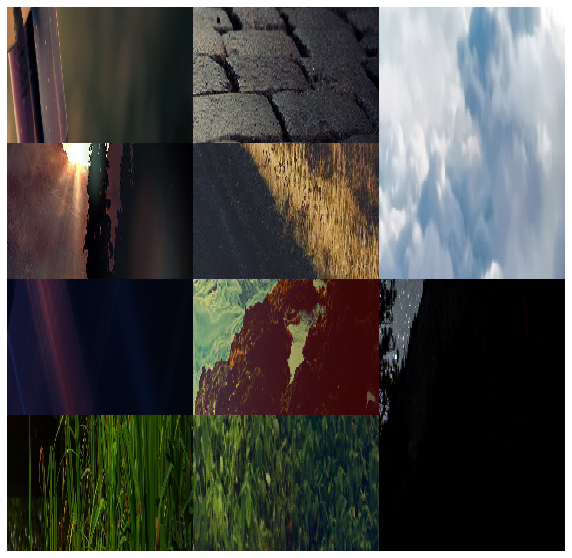

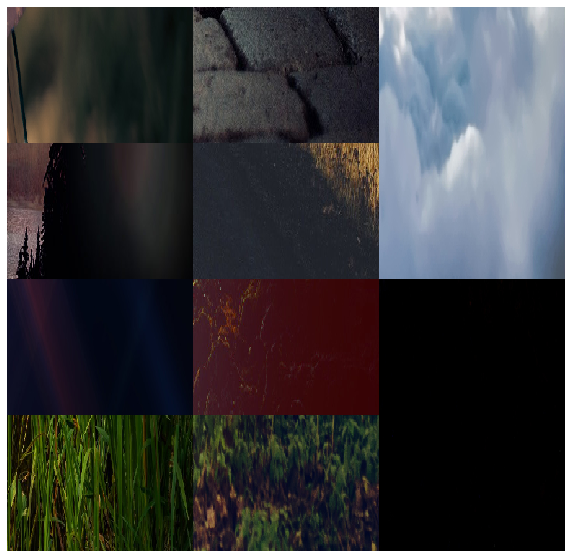

In [ ]:
stack_abstract=[]   # creating an empty list to made into a stack for inserting the abstract images.
y = 0       # variable to keep track of the number of abstract images formed
for x in range(0,1100,100): # the value of x from here helps in choosing the n blocks to help make the abstract image in each case
    j=0
    list=[] #list for storing the n blocks cut from each pixel
    #print(len(stack))
    if y == 10: #when y==10, 10 images have been created and so the loop breaks
        break

    for i in stack:# iterating over each pic in stack and extrating the n blocks from each and adding that to list


        if j<8:
            list.append(i[x:(x+100),x:(x+500),:]) # selection of n blocks from the first 8 pics                              
            j=j+1


        elif j==8 or j==9:
            list.append(i[(x+50):(x+250),x:(x+500),:]) #selection from the last 2 pics
            j=j+1

    arr1 = list[0] # initialising matrix arr1 with the n blocks cut from the first pic
    arr2 = list[4] # initialising matrix arr2 with the n blocks cut from the fifth pic

    #print(len(list))


    for i in range(1,9):
        if i < 4:
            arr1 = np.concatenate([arr1,list[i]], out=None) #concatenating the 2,3,4 elements of list with arr1 in rowise manner
            #print(arr1.shape)

        elif i==4 : # when i is 4 we just contionue to next iterartion as the 5th element of list is already in arr2
            continue

        elif 4 < i <8:
            arr2 = np.concatenate([arr2,list[i]], out=None) #concatenating the 6,7,8 elements of list with arr2 in rowise manner
            #print(arr2.shape)

        if i == 8:
            #print(arr1.shape , arr2.shape)

            arr1 = np.concatenate([arr1,arr2] , out=None, axis =1) # concatenating the arr1 and arr2 along the axis 1(columnwise)
        
            #print(arr1.shape)
            arr2 = np.concatenate([list[i],list[i+1]],out=None) #as we dont need the arr2 anymore we cahange it as the 
                                                                #arr of concatenated 9th and 10th element of the list
            
            
            arr1 = np.concatenate([arr1,arr2],out=None,axis =1) # concatenating the arr1 and arr2 to get the final abstract image 


    
    stack_abstract.append(arr1)  # inserting this arr1 into the stack for abstract images
    y=y+1
    


print ("-----------------------------------------------------")
print("ALBUM OF ABSTRACT ART...")
print("The number of images : ", len(stack_abstract))

for i in stack_abstract:   #Displaying the iamges in the stack_abstract


    plt.figure(figsize = (10,10))
    a=plt.imshow(i,interpolation='nearest',aspect="auto")
    plt.axis('off')




   
        
        
        
    